In [3]:
import pandas as pd

df = pd.read_csv("brics_trade_data_enriched_final.csv") 

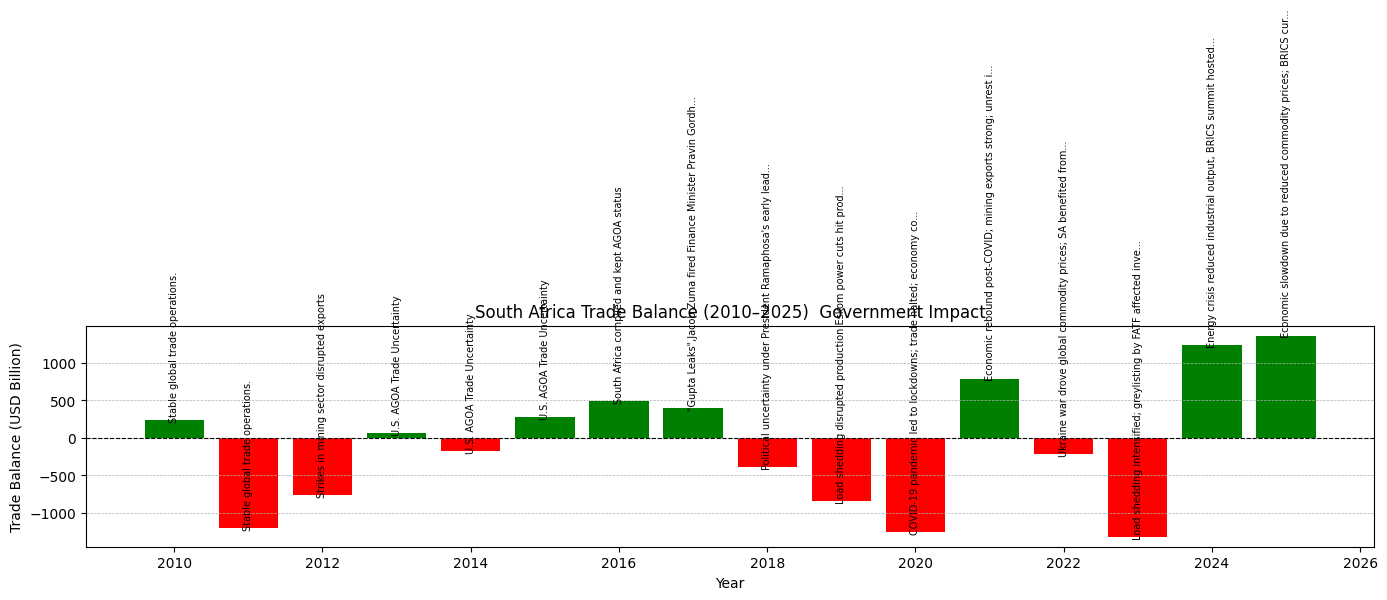

In [4]:
import matplotlib.pyplot as plt


sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]


plt.figure(figsize=(14, 6))
bars = plt.bar(
    sa_df['Year'],
    sa_df['Trade_Balance'],
    color=['green' if x > 0 else 'red' for x in sa_df['Trade_Balance']]
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("South Africa Trade Balance (2010–2025)  Government Impact")
plt.xlabel("Year")
plt.ylabel("Trade Balance (USD Billion)")
plt.grid(axis='y', linestyle='--', linewidth=0.5)


for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['Trade_Balance']

    short_note = note[:60] + "..." if len(note) > 60 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + (1 if y > 0 else -2), short_note, ha='center', fontsize=7, rotation=90)

plt.tight_layout()
plt.savefig("South Africa Trade Balance (2010–2025)  Government Impact.png")
plt.show()

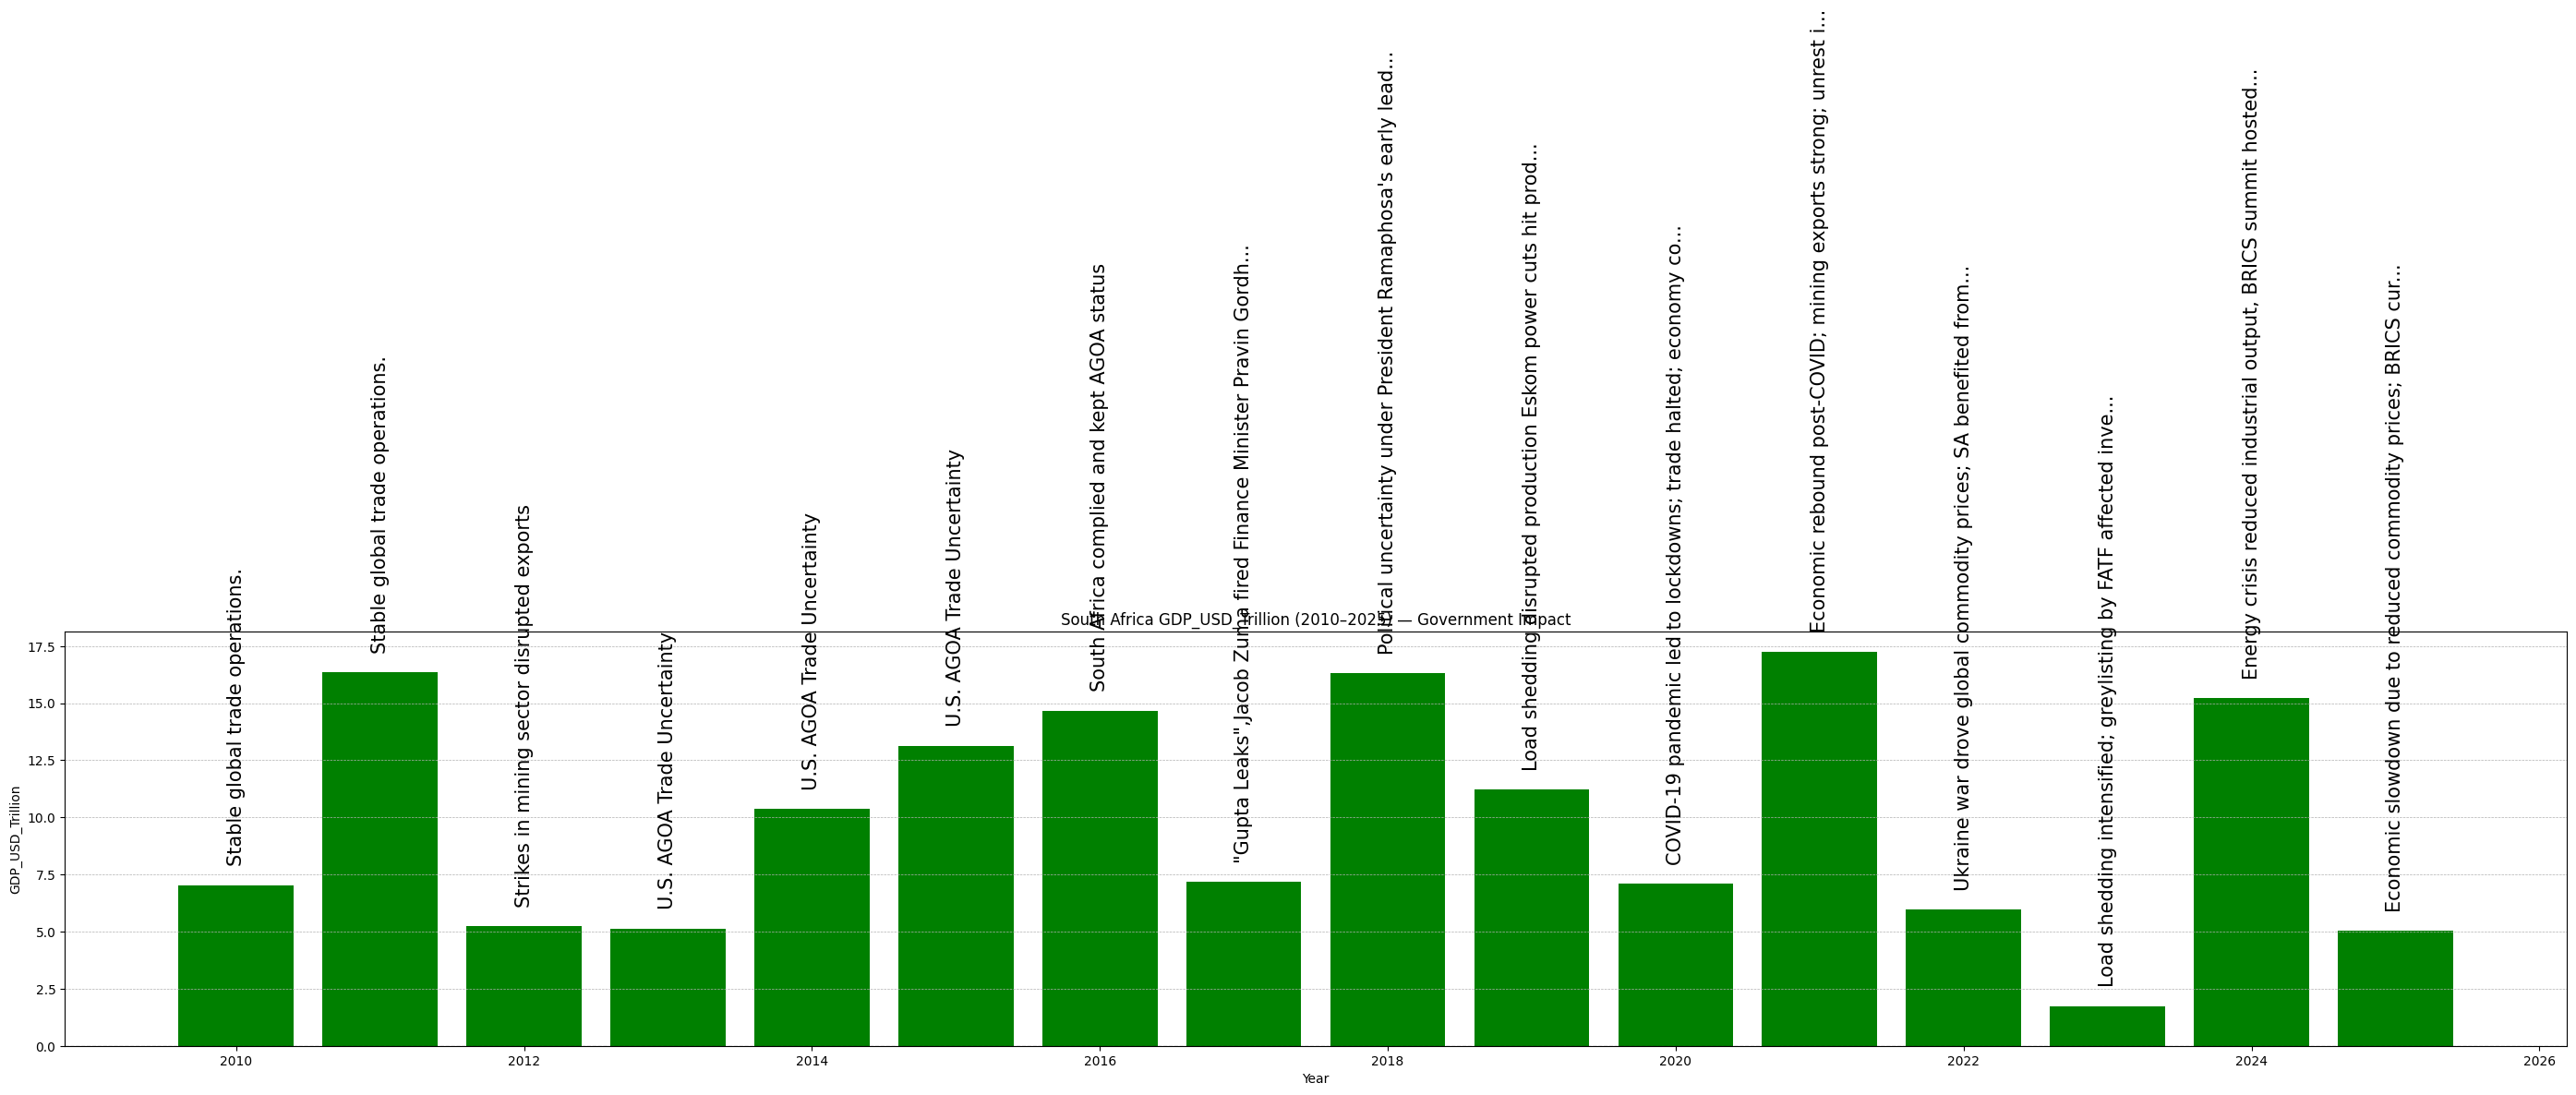

In [5]:
import matplotlib.pyplot as plt


sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]


plt.figure(figsize=(28, 12))
bars = plt.bar(
    sa_df['Year'],
    sa_df['GDP_USD_Trillion'],
    color=['green' if x > 0 else 'red' for x in sa_df['GDP_USD_Trillion']]
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("South Africa GDP_USD_Trillion (2010–2025) — Government Impact")
plt.xlabel("Year")
plt.ylabel("GDP_USD_Trillion")
plt.grid(axis='y', linestyle='--', linewidth=0.5)


for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['GDP_USD_Trillion']
    
   
    short_note = note[:60] + "..." if len(note) > 60 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + (1 if y > 0 else -2), short_note, ha='center', fontsize=15, rotation=90)

plt.tight_layout()
plt.savefig("South Africa GDP_USD_Trillion (2010–2025) Government Impact.png")
plt.show()

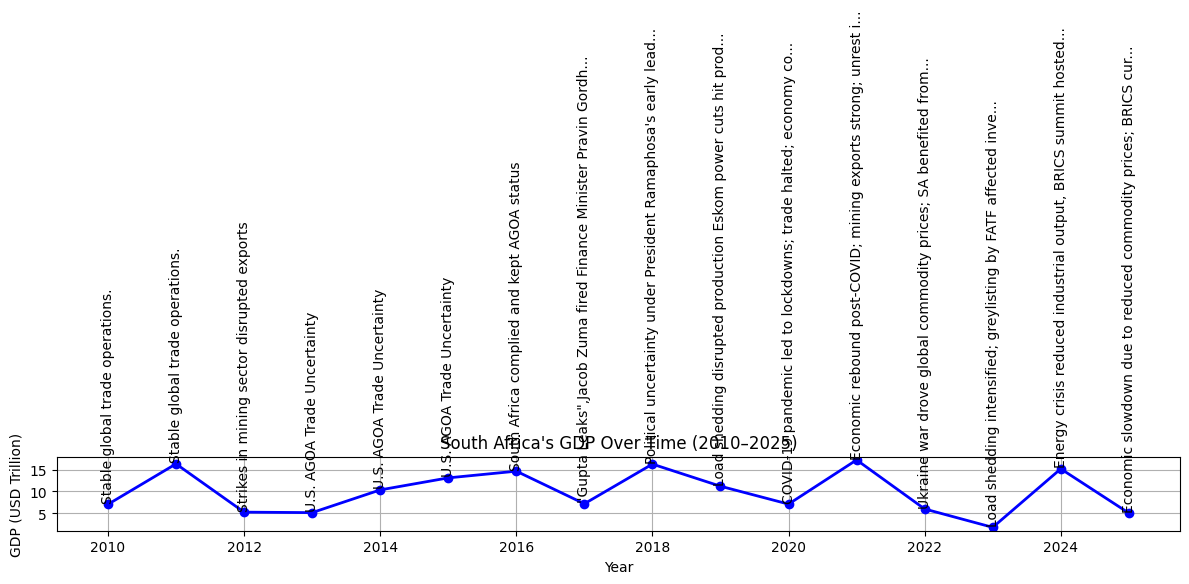

In [6]:
import matplotlib.pyplot as plt


sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]

plt.figure(figsize=(12, 6))
plt.plot(sa_df['Year'], sa_df['GDP_USD_Trillion'], marker='o', color='blue', linewidth=2)
plt.title("South Africa's GDP Over Time (2010–2025)")
plt.xlabel("Year")
plt.ylabel("GDP (USD Trillion)")
for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['GDP_USD_Trillion']
    
   
    short_note = note[:60] + "..." if len(note) > 60 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + (1 if y > 0 else -2), short_note, ha='center', fontsize=10, rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

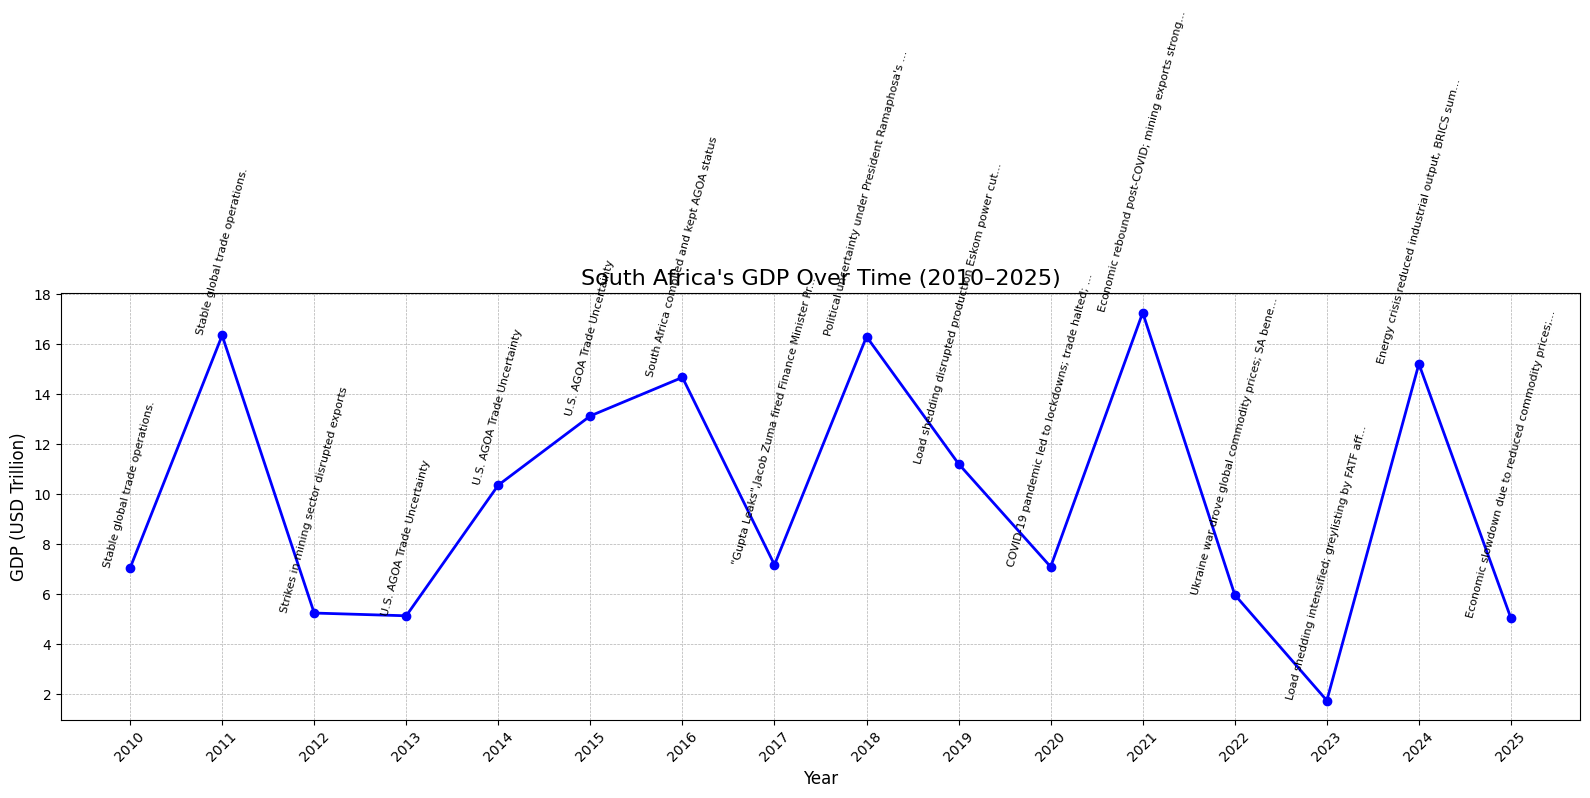

In [8]:
import matplotlib.pyplot as plt

# Filter South Africa data
sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]

# Larger figure to give notes more space
plt.figure(figsize=(16, 8))

# Plot GDP line
plt.plot(sa_df['Year'], sa_df['GDP_USD_Trillion'], marker='o', color='blue', linewidth=2)
plt.title("South Africa's GDP Over Time (2010–2025)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("GDP (USD Trillion)", fontsize=12)

# Add notes with better spacing
for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['GDP_USD_Trillion']
    
    short_note = note[:50] + "..." if len(note) > 50 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + 0.05, short_note, ha='center', fontsize=8, rotation=75)

plt.grid(True, linestyle='--', linewidth=0.5)
plt.xticks(sa_df['Year'], rotation=45)
plt.tight_layout()
plt.savefig("South Africa's GDP Over Time (2010–2025).png")
plt.show()


In [9]:
currency_values = {
    'South Africa': [0.14, 0.13, 0.12, 0.10, 0.09, 0.07, 0.065, 0.075, 0.070, 0.068, 0.064, 0.061, 0.059, 0.057, 0.056, 0.055],
    'India':         [0.022, 0.021, 0.020, 0.019, 0.018, 0.017, 0.016, 0.015, 0.014, 0.013, 0.013, 0.012, 0.012, 0.011, 0.011, 0.010],
    'Russia':        [0.032, 0.031, 0.030, 0.028, 0.026, 0.020, 0.016, 0.014, 0.013, 0.012, 0.010, 0.009, 0.008, 0.008, 0.008, 0.007],
    'Brazil':        [0.57, 0.55, 0.53, 0.52, 0.50, 0.48, 0.46, 0.44, 0.42, 0.40, 0.38, 0.36, 0.34, 0.33, 0.32, 0.31],
    'China':         [0.15, 0.155, 0.16, 0.162, 0.163, 0.165, 0.167, 0.168, 0.17, 0.171, 0.172, 0.173, 0.174, 0.175, 0.175, 0.175],
    'USA':           [1.0]*16
}

year_index = {year: i for i, year in enumerate(range(2010, 2026))}

def get_currency_value(row):
    year_idx = year_index.get(row['Year'], 0)
    return currency_values.get(row['Country'], [1.0]*16)[year_idx]

df['Currency_Value_USD'] = df.apply(get_currency_value, axis=1)


In [10]:
df.to_csv("brics_trade_data_with_currency_values.csv", index=False)


In [11]:
import pandas as pd

df = pd.read_csv("brics_trade_data_with_currency_values.csv") 

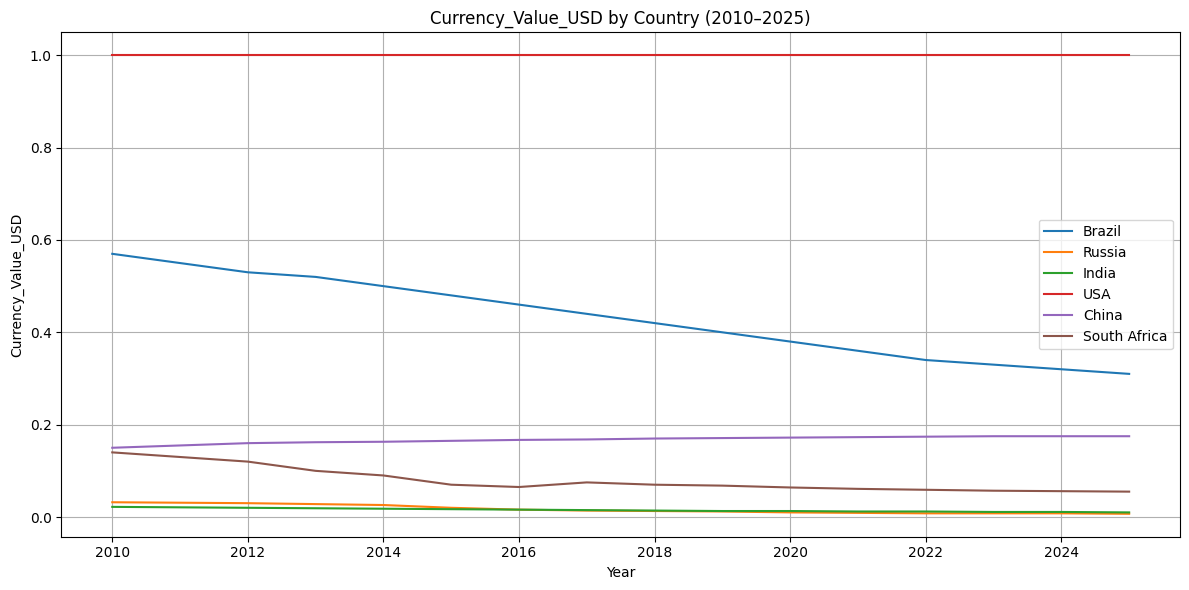

In [13]:
plt.figure(figsize=(12, 6))

for country in df['Country'].unique():
    country_data = df[df['Country'] == country]
    plt.plot(country_data['Year'], country_data['Currency_Value_USD'], label=country)

plt.title("Currency_Value_USD by Country (2010–2025)")
plt.xlabel("Year")
plt.ylabel("Currency_Value_USD")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("Currency_Value_USD by Country (2010–2025).png")
plt.show()

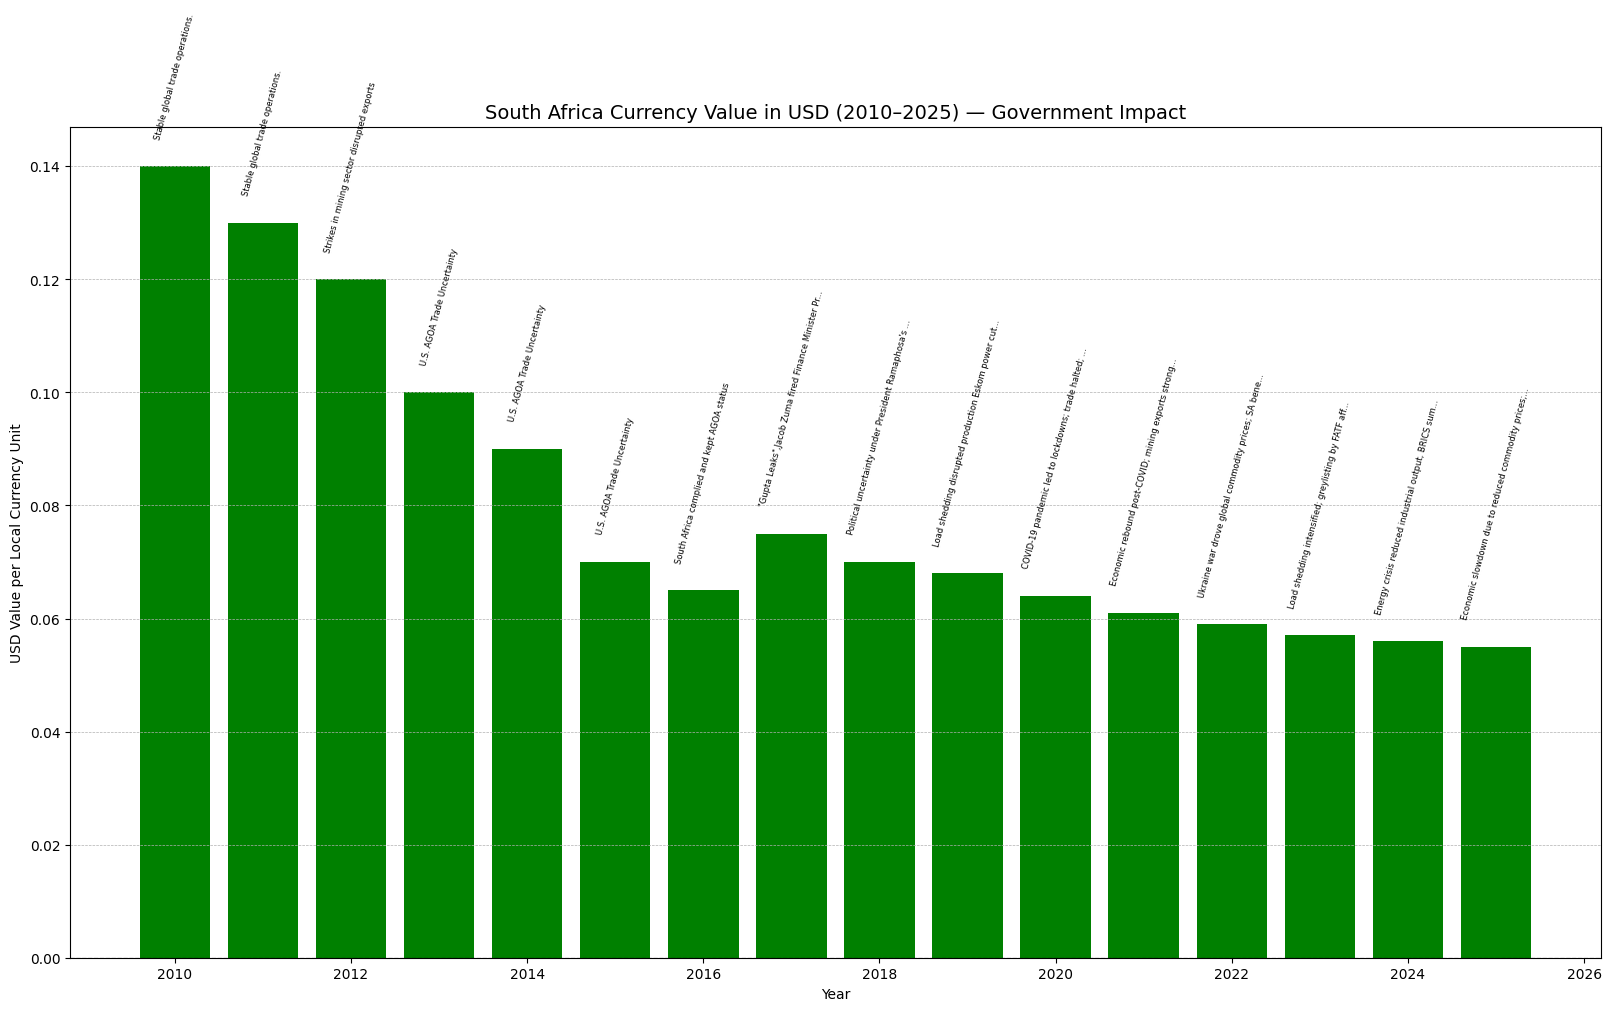

In [15]:
import matplotlib.pyplot as plt

sa_df = df[(df['Country'] == 'South Africa') & (df['Year'] >= 2010)]

plt.figure(figsize=(16, 10), constrained_layout=True)

bars = plt.bar(
    sa_df['Year'],
    sa_df['Currency_Value_USD'],
    color=['green' if x > 0 else 'red' for x in sa_df['Currency_Value_USD']]
)

plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.title("South Africa Currency Value in USD (2010–2025) — Government Impact", fontsize=14)
plt.xlabel("Year")
plt.ylabel("USD Value per Local Currency Unit")
plt.grid(axis='y', linestyle='--', linewidth=0.5)

for i, row in sa_df.iterrows():
    note = str(row['Notes'])
    y = row['Currency_Value_USD']
    short_note = note[:50] + "..." if len(note) > 50 else note
    if note.strip() and note != 'nan':
        plt.text(row['Year'], y + 0.005, short_note, ha='center', fontsize=6, rotation=75)

plt.savefig("South Africa Currency_Value_USD (2010–2025)  Government Impact.png")
plt.show()


In [18]:
pip install --upgrade pip

  Using cached pip-25.0.1-py3-none-any.whl.metadata (3.7 kB)
Using cached pip-25.0.1-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 24.3.1
    Uninstalling pip-24.3.1:
      Successfully uninstalled pip-24.3.1
Note: you may need to restart the kernel to use updated packages.
